In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score

import skorch
import torch
import torch.nn as nn

from neural_net import NeuralNet
from textdataset_classification import TextDataset

### Chunk Size 150

In [3]:
X = np.load('Data/text_data150.npy')
y = np.load('Data/labels150.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

Explained variance as a function of the number of components

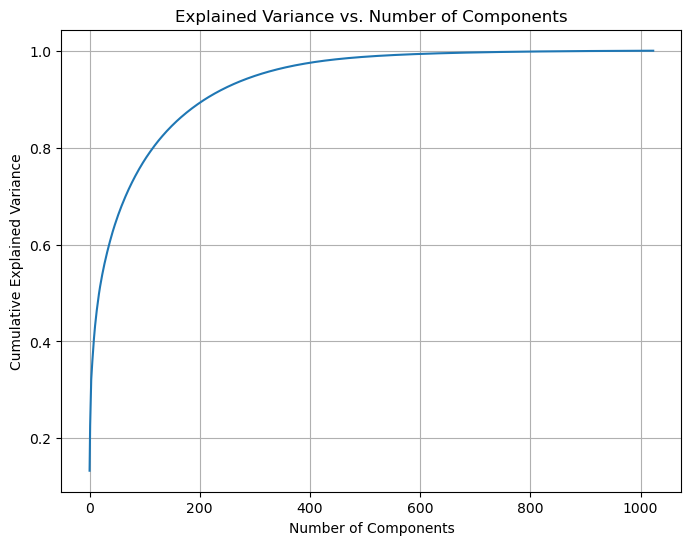

In [5]:
pca = PCA(n_components=None)
pca.fit(X_train)  # Fit PCA on the training data features

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


From 306 components and up, 95% or more of the variance is explained

### Number of necessary components 150 chunk size

Accuracy as a function of the number of components

In [6]:
loss_fn = nn.CrossEntropyLoss()

num_comp = np.arange(6, 307, 3)
accuracy = np.zeros(len(num_comp))

for idx, n_comp in enumerate(num_comp):
    print(n_comp)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

    # reducing the dimensionality
    pca = PCA(n_components=n_comp)
    X_train = pca.fit_transform(X_train)

    y_train = torch.from_numpy(y_train).long()

    net = skorch.NeuralNetClassifier(
        NeuralNet(input_dim=n_comp),
        max_epochs=10,
        lr=0.01,
        iterator_train__shuffle=True,
        optimizer=torch.optim.Adam
    )

    net.fit(X_train, y_train)

    accuracy[idx] = np.mean(cross_val_score(net, X_train, y_train, scoring='accuracy', cv=10))

6
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.2443       0.9884        0.0499  0.0511
      2        0.0453       0.9894        0.0433  0.0537
      3        0.0415       0.9852        0.0450  0.0561
      4        0.0400       0.9873        0.0441  0.0546
      5        0.0396       0.9873        0.0426  0.0504
      6        0.0399       0.9884        0.0416  0.0479
      7        0.0378       0.9842        0.0480  0.0536
      8        0.0373       0.9842        0.0426  0.0483
      9        0.0389       0.9842        0.0437  0.0485
     10        0.0366       0.9873        0.0408  0.0476
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.0428       0.9930        0.0278  0.0480
      2        0.0368       0.9918        0.0258  0.0401
      3        0.0414       0.9894        0.0293  0.0501
      4        0.0376       0

In [9]:
np.save('Results/accuracy_pca_reduction_150_chunk.npy', accuracy)

### Number of necessary components for sentence embedding

In [10]:
X = np.load('Data/text_data_sentences.npy')
y = np.load('Data/labels_sentences.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

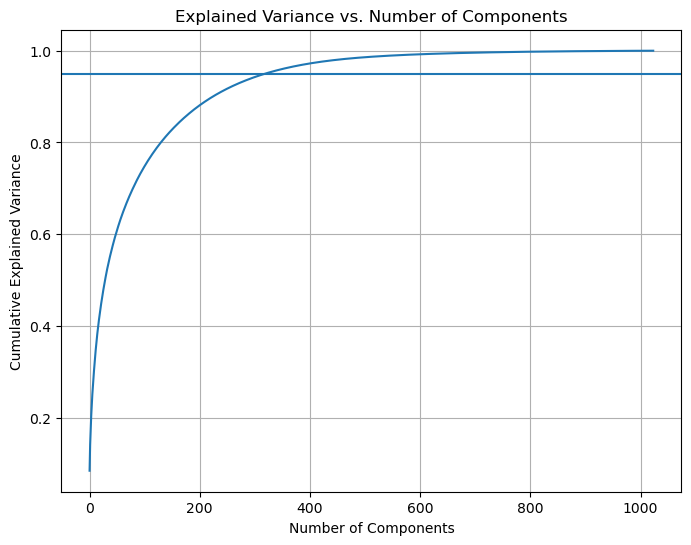

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_train)  # Fit PCA on the training data features

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(0.95)
plt.grid(True)
plt.show()

Accuracy as a function of the number of components

In [ ]:
num_comp = np.arange(6, 307, 3)
accuracy = np.zeros(len(num_comp))

for idx, n_comp in enumerate(num_comp):
    print(n_comp)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

    # reducing the dimensionality
    pca = PCA(n_components=n_comp)
    X_train = pca.fit_transform(X_train)

    y_train = torch.from_numpy(y_train).long()

    net = skorch.NeuralNetClassifier(
        NeuralNet(input_dim=n_comp),
        max_epochs=10,
        lr=0.01,
        iterator_train__shuffle=True,
        optimizer=torch.optim.Adam
    )

    net.fit(X_train, y_train)

    accuracy[idx] = np.mean(cross_val_score(net, X_train, y_train, scoring='accuracy', cv=10))

6
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.4681       0.8280        0.4552  0.1003
      2        0.3799       0.8485        0.4087  0.1064
      3        0.3775       0.8485        0.4077  0.1055
      4        0.3713       0.8455        0.4125  0.1074
      5        0.3727       0.8445        0.4107  0.0980
      6        0.3703       0.8400        0.4188  0.1069
      7        0.3725       0.8450        0.4111  0.1055
      8        0.3723       0.8395        0.4178  0.1015
      9        0.3664       0.8490        0.4042  0.1050
     10        0.3624       0.8440        0.4116  0.1053
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3667       0.8333        0.4315  0.0965
      2        0.3661       0.8444        0.4105  0.0891
      3        0.3685       0.8461        0.4200  0.0945
      4        0.3671       0

In [15]:
np.save('Results/accuracy_pca_reduction_sentences.npy', accuracy)